In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("economic_index.csv")

In [3]:
print(df.head())

   Unnamed: 0  year  month  interest_rate  unemployment_rate  index_price
0           0  2017     12           2.75                5.3         1464
1           1  2017     11           2.50                5.3         1394
2           2  2017     10           2.50                5.3         1357
3           3  2017      9           2.50                5.3         1293
4           4  2017      8           2.50                5.4         1256


In [4]:
df.drop(columns=['year','month','Unnamed: 0'],axis=1,inplace=True)

In [5]:
## check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

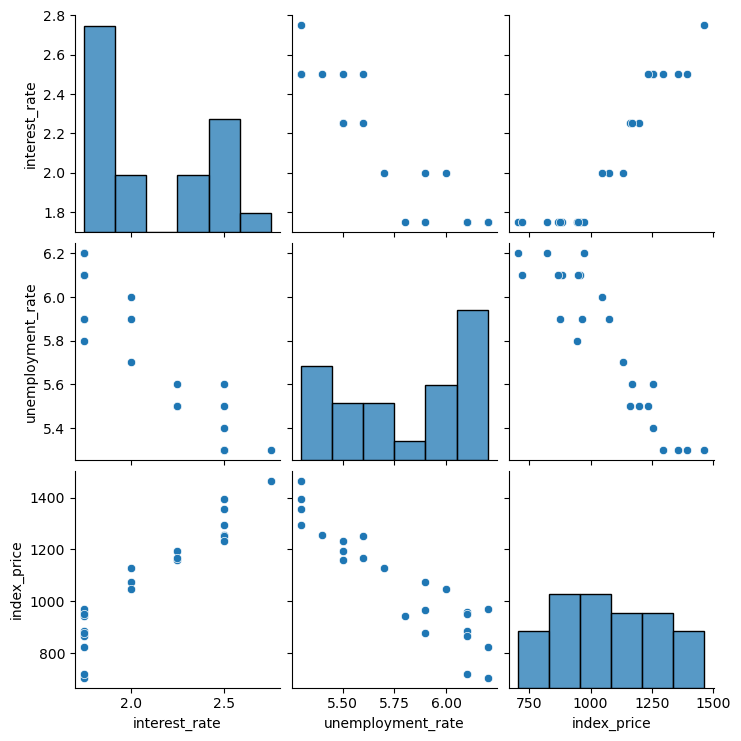

In [6]:
import seaborn as sns
sns.pairplot(df)

In [7]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

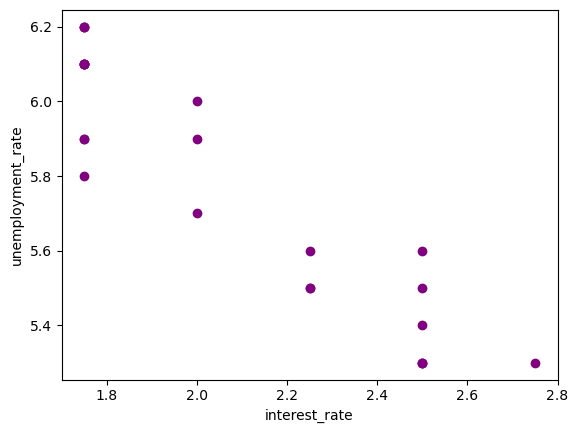

In [8]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='purple')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [9]:
## independent and dependent features
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [10]:
print(X)

    interest_rate  unemployment_rate
0            2.75                5.3
1            2.50                5.3
2            2.50                5.3
3            2.50                5.3
4            2.50                5.4
5            2.50                5.6
6            2.50                5.5
7            2.25                5.5
8            2.25                5.5
9            2.25                5.6
10           2.00                5.7
11           2.00                5.9
12           2.00                6.0
13           1.75                5.9
14           1.75                5.8
15           1.75                6.1
16           1.75                6.2
17           1.75                6.1
18           1.75                6.1
19           1.75                6.1
20           1.75                5.9
21           1.75                6.2
22           1.75                6.2
23           1.75                6.1


In [11]:
print(Y)

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [13]:
print(X_train)
print(" ")
print(X_test)
print(" ")
print(Y_train)
print(" ")
print(Y_test)

    interest_rate  unemployment_rate
13           1.75                5.9
1            2.50                5.3
21           1.75                6.2
5            2.50                5.6
2            2.50                5.3
12           2.00                6.0
15           1.75                6.1
3            2.50                5.3
4            2.50                5.4
22           1.75                6.2
17           1.75                6.1
20           1.75                5.9
23           1.75                6.1
7            2.25                5.5
10           2.00                5.7
14           1.75                5.8
19           1.75                6.1
6            2.50                5.5
 
    interest_rate  unemployment_rate
8            2.25                5.5
16           1.75                6.2
0            2.75                5.3
18           1.75                6.1
11           2.00                5.9
9            2.25                5.6
 
13     965
1     1394
21     822
5

<Axes: xlabel='interest_rate', ylabel='index_price'>

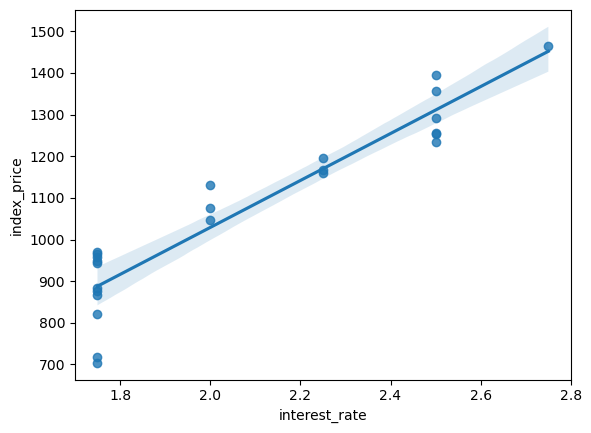

In [14]:
sns.regplot(x=df['interest_rate'],y=df['index_price'],data=df)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

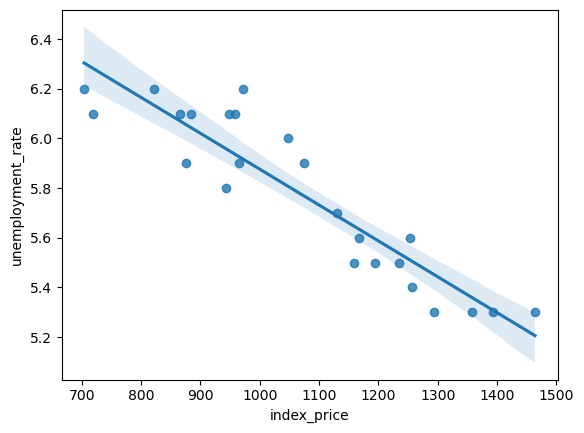

In [15]:
# regplot in Seaborn visualizes the linear relationship between two variables, 
# displaying data points and a regression line with a confidence interval.
# It's useful for exploring how one variable changes in relation to another.
sns.regplot(y=df['unemployment_rate'],x=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

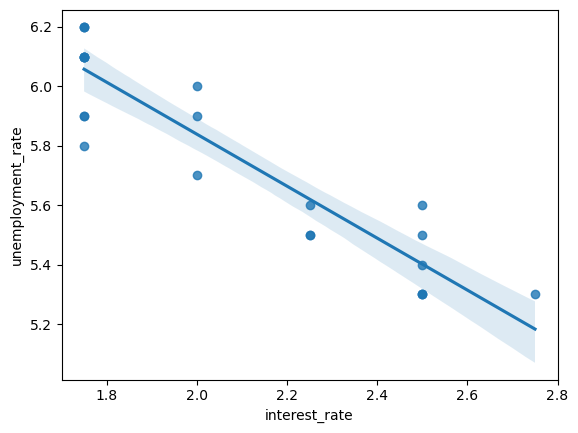

In [16]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [18]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [19]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [20]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [21]:
regression.fit(X_train,Y_train)

LinearRegression()

In [ ]:
## cross_val_score returns an array of scores, with one score for each fold of cross-validation performed
## Cross-validation is a technique used to evaluate the performance of a model by splitting the data into multiple folds 
# and training/testing the model on different combinations of these folds.
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [27]:
np.mean(validation_score)

-5914.828180162396

In [22]:
y_pred=regression.predict(X_test)

In [23]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse,mae,rmse)

8108.567426306611 73.80444932337099 90.04758423359624


In [26]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

0.7591371539010254
0.5985619231683756


# Assumptions

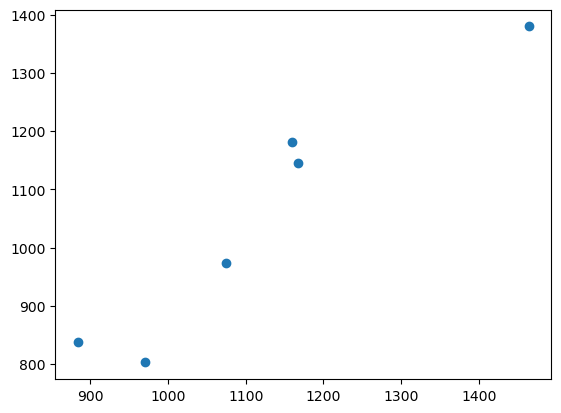

In [27]:
plt.scatter(Y_test,y_pred)

In [28]:
residuals=Y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


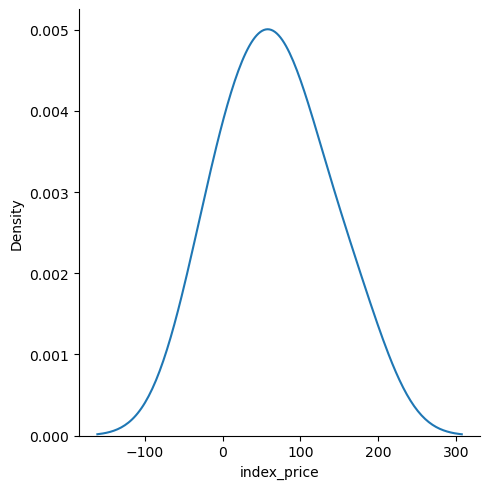

In [29]:
sns.displot(residuals,kind='kde')

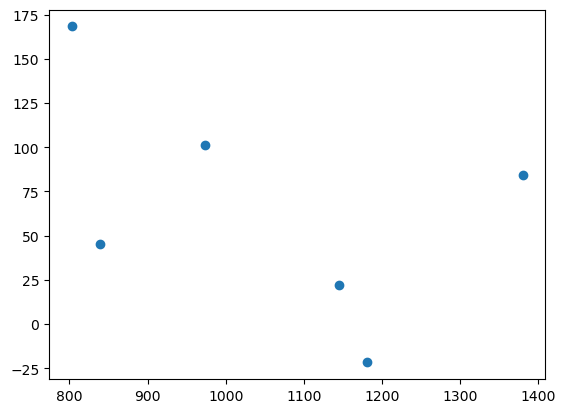

In [30]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [31]:
## OLS linear regression
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()

In [32]:
model.summary()

c:\anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 18 May 2025   Prob (F-statistic):                       0.754
Time:                        04:13:12   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
print(regression.coef_)

[  88.27275507 -116.25716066]
